# Exploratory Data Analysis

In [17]:
# 데이터 출처 : 롯데멤버스, L.pay|L.POINT, 제6회 L.POINT Big Data Competition
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_action = pd.read_csv('../input/action.csv', parse_dates=['sess_dt'])
df_transaction = pd.read_csv('../input/transaction.csv', parse_dates=['de_dt'])
df_client_demo = pd.read_csv('../input/demographic.csv')
df_product = pd.read_csv('../input/item_details')

## Online Action columns
- clnt_id : 클라이언트 ID, 고객을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID
- sess_id : 세션 ID, Web/App에 접속 후 세션이 시작될 때 부여된 순번 ID (클라이언트 ID에 여러개의 세션 ID 발급될 수 있음)
- hit_seq : 조회일련번호, 조회 순서를 알 수 있도록 부여된 일련번호
- action_type : 행동유형, 총 8가지의 행동 유형을 구분한 코드 [0.검색/ 1.제품 목록/ 2.제품 세부정보 보기/ 3. 장바구니 제품 추가/ 4, 장바구니 제품 삭제/ 5. 결제시도/ 6. 구매 완료/ 7. 구매환불/ 8. 결제옵션]
- biz_unit : 업종단위, 온라인 및 오프라인 이용처를 구분하는 단위코드
- sess_dt : 세션일자, (YYYYMMDD 형식)
- hit_tm : 조회시간 (HH:MM 형식)
- hit_pss_tm : 조회경과시간, 세션이 시작된 이후 해당 조회까지 경과한 시간(단위:밀리초), 첫번째 조회하면 0으로 설정
- trans_id : 거래 ID, 구매내역을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID
- srch_kwd : 검색 키워드, 고객이 검색한 키워드
- tot_pag_view_ct : 홈페이지조회건수, 세션 내의 총 페이지(화면)뷰 수
- tot_sess_hr_v : 총세션시간값, 세션 내 총 시간(단위: 초)
- trfc_src : 유입채널, 고객이 유입된 채널, [DIRECT/ PUSH/ WEBSITE/ PORTAL_1/ PORTAL_2/ PORTAL_3/ unknown]
- dvc_ctg_nm : 기기유형, [mobile_web/ mobile_app/ PC]

In [18]:
print(df_action.shape)
df_action.tail(10)

(3196362, 14)


,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
3196352,31032,3,5,0,A02,2019-08-05,10:54,47963,NaN,오야니,8.0,356.0,unknown,mobile_app
3196353,31032,2,6,0,A02,2019-08-04,22:37,527684,NaN,오야니,19.0,1047.0,unknown,mobile_app
3196354,31032,2,9,0,A02,2019-08-04,22:41,771472,NaN,오야니,19.0,1047.0,unknown,mobile_app
3196355,31032,2,1,0,A02,2019-08-04,22:35,356864,NaN,양가죽자켓,19.0,1047.0,unknown,mobile_app
3196356,31032,3,1,0,A02,2019-08-05,10:53,8782,NaN,오야니,8.0,356.0,unknown,mobile_app
3196357,31040,1,1,0,A02,2019-08-15,03:47,13525,NaN,다이슨 에어랩,4.0,62.0,unknown,mobile_web
3196358,4129,1,2,0,A02,2019-07-21,01:22,250099,NaN,여성메탈시계,3.0,250.0,unknown,mobile_web
3196359,4129,1,1,0,A02,2019-07-21,01:18,1525,NaN,여성메탈시계,3.0,250.0,unknown,mobile_web
3196360,54403,3,1,0,A02,2019-07-31,20:14,16905,NaN,비비고왕교자,3.0,68.0,unknown,mobile_app
3196361,54403,4,1,0,A02,2019-08-18,16:35,82700,NaN,에포테쉬볼륨팝브러쉬,5.0,101.0,unknown,mobile_app


### Missing Data

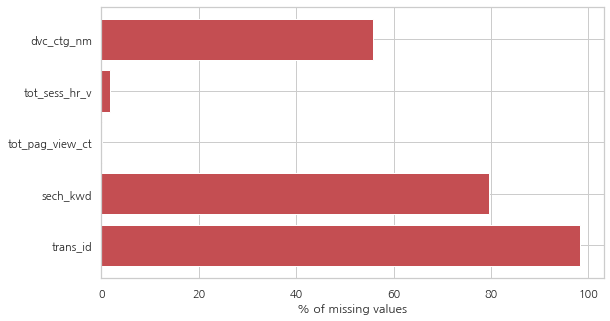

In [19]:
df_missing = df_action.isnull().sum(axis=0).reset_index()
df_missing.columns = ['column_name', 'missing_count']
df_missing = df_missing.loc[df_missing['missing_count']>0]
ind = np.arange(df_missing.shape[0])
fig, ax = plt.subplots(figsize=(9,5))
rects = ax.barh(ind, (df_missing.missing_count.values/len(df_action))*100, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(df_missing.column_name.values, rotation='horizontal')
ax.set_xlabel("% of missing values")
plt.show()

In [20]:
def convert_str(row):
    if row['action_type'] == 0:
        return '검색'
    elif row['action_type'] == 1:
        return '제품목록'
    elif row['action_type'] == 2:
        return '제품 세부정보 보기'
    elif row['action_type'] == 3:
        return '장바구니 제품 추가'
    elif row['action_type'] == 4:
        return '장바구니 제품 삭제'
    elif row['action_type'] == 5:
        return '결제 시도'
    elif row['action_type'] == 6:
        return '구매 완료'
    elif row['action_type'] == 7:
        return '구매 환불'
    else:
        return '결제 옵션'

In [21]:
df_action['action_type_str'] = df_action.apply(lambda row: convert_str(row), axis=1)

#### action type별 빈도수
- 결제시도 및 검색의 빈도수가 제일 높았다.

Text(0.5, 1.0, 'Frequency of Action type')

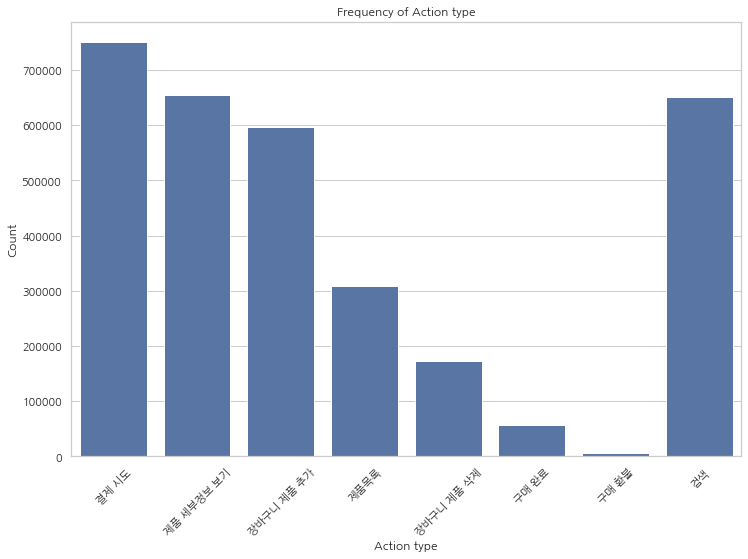

In [22]:
color = sns.color_palette()
plt.figure(figsize=(12,8))
sns.countplot(x="action_type_str", data=df_action, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Action type', fontsize=12)
plt.xticks(rotation=45)
plt.title('Frequency of Action type')

#### 기기유형별 빈도수
- mobile web & web 에서의 사용 빈도수가 상대적으로 PC보다 높습니다.

Text(0.5, 1.0, '기기유형')

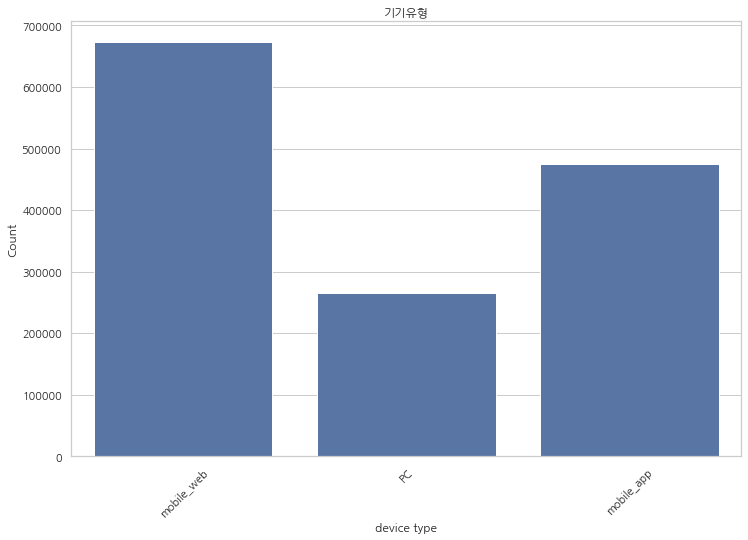

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x="dvc_ctg_nm", data=df_action, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('device type', fontsize=12)
plt.xticks(rotation=45)
plt.title('기기유형')

## Transaction columns
- clnt_id : 클라이언트 ID 
- trans_id : 거래 ID
- trans_seq: 거래일련번호, 해당 거래 ID의 구매 내역 내 구매 순서를 알 수 있도록 부여된 일련번호
- biz_unit : 업종단위  
- pd_c : 상품소분류코드,
- de_dt : 상품을 구매한 일자 (YYYYMMDD)
- de_tm : 상품을 구매한 시각 (HH:MM)
- buy_am : 구매한 상품의 금액
- buy_ct : 구매한 상품의 수량

In [24]:
print(df_transaction.shape)
df_transaction.tail(10)

(599961, 9)


,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
599951,2400,4453,2,B03,0313,2019-09-27,11:25,7700,1
599952,28484,13342,1,B03,1060,2019-09-27,15:47,5000,1
599953,54080,2842,2,B03,0339,2019-09-27,16:16,5200,1
599954,54080,2842,1,B03,1066,2019-09-27,16:16,12600,1
599955,35311,2839,1,B03,0339,2019-09-27,14:09,4500,1
599956,35311,2839,3,B03,0339,2019-09-27,14:09,3500,1
599957,35311,2839,4,B03,0339,2019-09-27,14:09,3600,2
599958,35311,2839,5,B03,0339,2019-09-27,14:09,3500,1
599959,35311,2839,2,B03,0339,2019-09-27,14:09,4500,1
599960,35311,2839,6,B03,0324,2019-09-27,14:09,6800,1


#### 구매시기별 구매갯수 
- 데이터가 7월~ 10월 3개월분 데이터이다.
- 전체적으로 구매 갯수는 비슷하게 보였으며 19년 9월 1일에 최대 구매갯수가 발생하였다

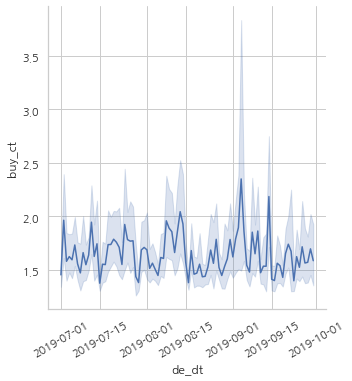

In [29]:
g = sns.relplot(x="de_dt", y="buy_ct", kind="line", data=df_transaction)
g.set_xticklabels(rotation=30)
plt.show()

#### 요일별 빈도수
- 토요일에 구매 빈도수가 제일 높고 일요일에 구매 빈도수가 제일 낮습니다

In [30]:
df_transaction['dedt_name'] = df_transaction.de_dt.dt.weekday_name

Text(0.5, 1.0, 'Frequency of transaction by week day')

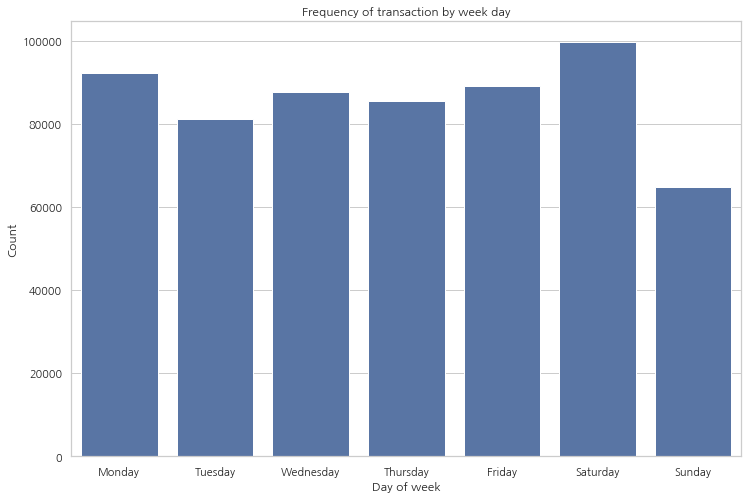

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x="dedt_name", order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], data=df_transaction, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title('Frequency of transaction by week day')

#### 시간대별 빈도수
- 17시에 빈도수가 제일 높으며 새벽대에는 전체적으로 빈도수가 낮았습니다.

Text(0.5, 1.0, 'Frequency of order by hour of day')

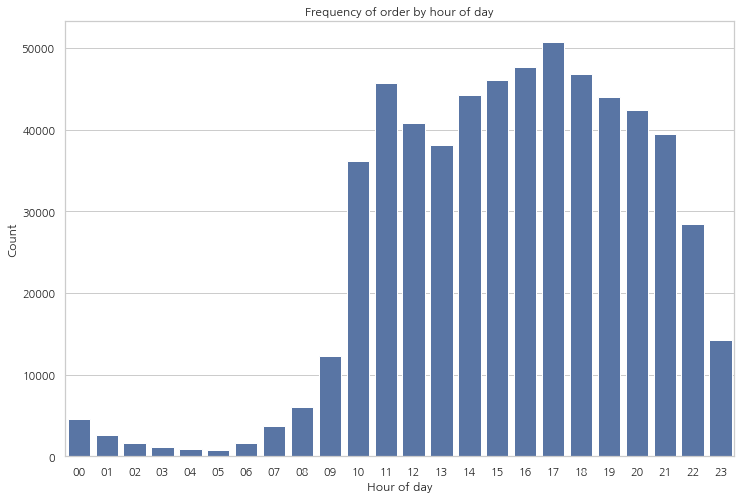

In [32]:
df_transaction["de_tm_hour"] = df_transaction["de_tm"].apply(lambda time: time.split(':')[0])
plt.figure(figsize=(12,8))
sns.countplot(x="de_tm_hour", data=df_transaction, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title('Frequency of order by hour of day')

#### 요일별 & 시간대별 빈도수 Heatmap
- 토요일은 오전부터 저녁까지 빈도수가 높음을 보이고 일요일은 대체적으로 빈도수가 적음을 보였습니다.

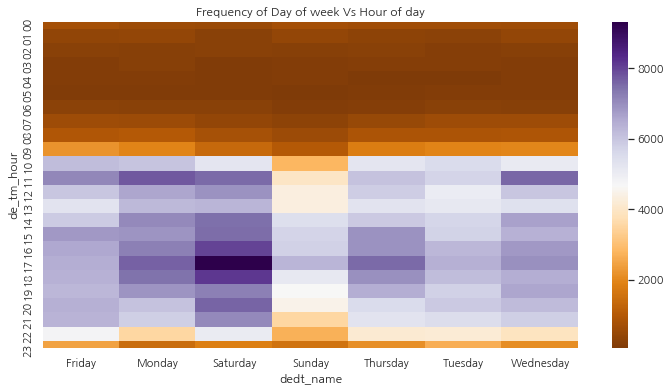

In [35]:
grouped_df = df_transaction.groupby(["dedt_name", "de_tm_hour"])["buy_ct"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('dedt_name', 'de_tm_hour', 'buy_ct').T

plt.figure(figsize=(12, 6))
sns.heatmap(grouped_df, cmap='PuOr')
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

## Client Demographic
- clnt_id : 클라이언트 ID
- clnt_gender : 성별 [M/F/unknown]
- clnt_age : 연령대 [10대 이하/ 20대/ 30대/ 40대/ 50대/ 60대 이상/ 정보없음 : unknown]

In [26]:
print(df_client_demo.shape)
df_client_demo.tail(10)

(72399, 3)


,clnt_id,clnt_gender,clnt_age
72389,72420,unknown,unknown
72390,72421,unknown,unknown
72391,72422,unknown,unknown
72392,72423,F,30
72393,72424,M,40
72394,72425,unknown,unknown
72395,72426,unknown,unknown
72396,72427,unknown,unknown
72397,72428,unknown,unknown
72398,72429,unknown,unknown


Text(0.5, 1.0, '고객 성별 빈도수')

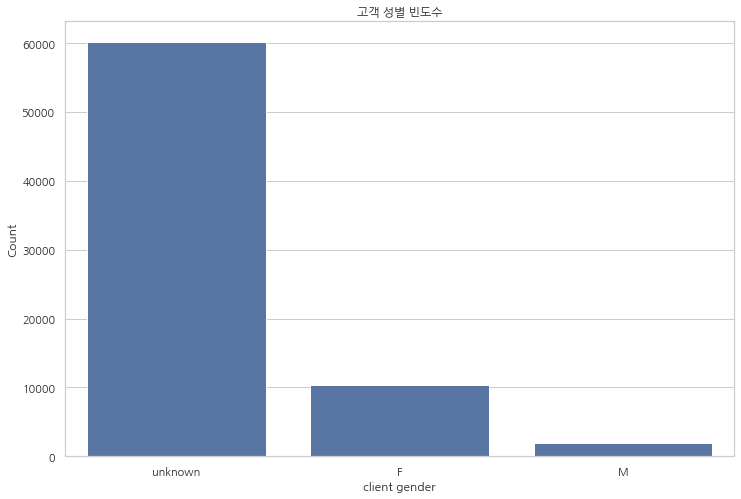

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(x="clnt_gender", data=df_client_demo, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('client gender', fontsize=12)
# plt.xticks(rotation=45)
plt.title('고객 성별 빈도수')

Text(0.5, 1.0, '고객 연령대')

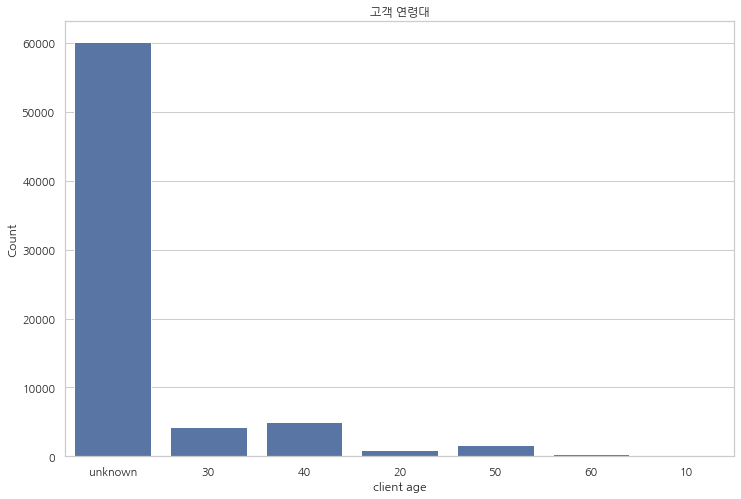

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(x="clnt_age", data=df_client_demo, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('client age', fontsize=12)
# plt.xticks(rotation=45)
plt.title('고객 연령대')

## Product columns
- pd_c : 상품 소분류코드 (최소단위)
- clac_nm1 : 상품 대분류명
- clac_nm2 : 상품 중분류명
- clac_nm3 : 상품 소분류명

In [27]:
print(df_product.shape)
df_product.tail(10)

(1667, 4)


,pd_c,clac_nm1,clac_nm2,clac_nm3
1657,1658,Women's Clothing,Women's Special Use Clothing,Other Women's Special Use Clothing
1658,1659,Women's Clothing,Women's Special Use Clothing,Women's Costumes
1659,1660,Women's Clothing,Women's Special Use Clothing,Women's Fashion Trainingwear
1660,1661,Women's Clothing,Women's Upper Bodywear / Tops,Women's Blouses
1661,1662,Women's Clothing,Women's Upper Bodywear / Tops,Women's Button-Down Shirts
1662,1663,Women's Clothing,Women's Upper Bodywear / Tops,Women's Cardigans
1663,1664,Women's Clothing,Women's Upper Bodywear / Tops,Women's Sweaters / Pullover
1664,1665,Women's Clothing,Women's Upper Bodywear / Tops,Women's Sweatshirts / Hoodies
1665,1666,Women's Clothing,Women's Upper Bodywear / Tops,Women's T-shirts / Tops
1666,1667,Women's Clothing,Women's Upper Bodywear / Tops,Women's Vests


### Missing Data

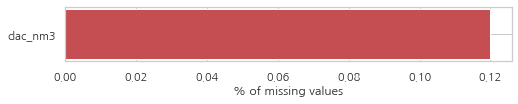

In [28]:
df_missing = df_product.isnull().sum(axis=0).reset_index()
df_missing.columns = ['column_name', 'missing_count']
df_missing = df_missing.loc[df_missing['missing_count']>0]
ind = np.arange(df_missing.shape[0])
fig, ax = plt.subplots(figsize=(8,1))
rects = ax.barh(ind, (df_missing.missing_count.values/len(df_product))*100, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(df_missing.column_name.values, rotation='horizontal')
ax.set_xlabel("% of missing values")
plt.show()

In [41]:
df_product['pd_c'] = df_product['pd_c'].apply(lambda num: "{:04n}".format(num))

# df_transaction and df_prodcct merge!
df = pd.merge(df_transaction, df_product, how='left')

column_titles = ['clnt_id', 'de_dt', 'pd_c', 'clac_nm1', 'clac_nm2', 'clac_nm3', 'buy_ct']
df.reindex(columns=column_titles).tail()

,clnt_id,de_dt,pd_c,clac_nm1,clac_nm2,clac_nm3,buy_ct
599956,35311,2019-09-27,0339,Cosmetics / Beauty Care,Skin Care,Facial Masks,1
599957,35311,2019-09-27,0339,Cosmetics / Beauty Care,Skin Care,Facial Masks,2
599958,35311,2019-09-27,0339,Cosmetics / Beauty Care,Skin Care,Facial Masks,1
599959,35311,2019-09-27,0339,Cosmetics / Beauty Care,Skin Care,Facial Masks,1
599960,35311,2019-09-27,0324,Cosmetics / Beauty Care,Makeup,Nail Stickers / Stones,1


#### 상품 대분류명 구매 빈도수 
- 야채, 스낵류, 데일리물품의 빈도수가 제일 높았다. 
- 상위권 대부분이 식품이다.

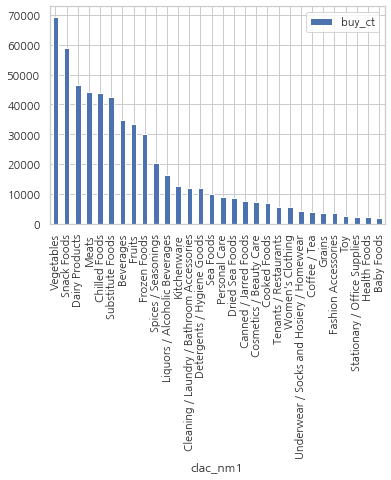

In [42]:
popular_nm1 = pd.DataFrame(df.groupby('clac_nm1')['buy_ct'].count())
most_popular_nm1 = popular_nm1.sort_values('buy_ct', ascending=False)
most_popular_nm1.head(30).plot(kind = "bar")

#### 상품 중분류명 빈도수
- 스낵, 과일, 냉동 인스턴트 식품이 상위권을 보였다.
- 대분류명과 마찬가지로 식품이 상위권에 분포되어 있다.

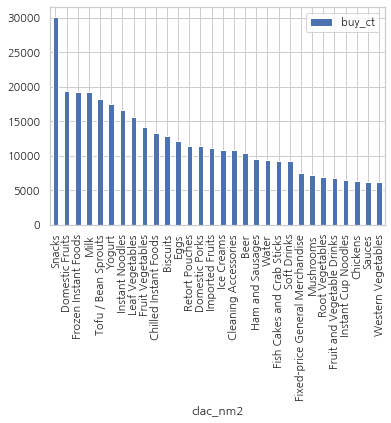

In [43]:
popular_nm2 = pd.DataFrame(df.groupby('clac_nm2')['buy_ct'].count())
most_popular_nm2 = popular_nm2.sort_values('buy_ct', ascending=False)
most_popular_nm2.head(30).plot(kind = "bar")

#### 상품 소분류명 빈도수
- 스낵, 우유, 달걀, 라멘 등 간단한 음식이 상위권에 분포되어있다.

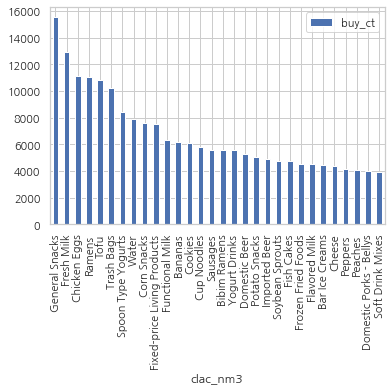

In [44]:
popular_nm3 = pd.DataFrame(df.groupby('clac_nm3')['buy_ct'].count())
most_popular_nm3 = popular_nm3.sort_values('buy_ct', ascending=False)
most_popular_nm3.head(30).plot(kind = "bar")